In [1]:
# This notebook demonstrates the regularization paths for lasso and elastic net on simulated data with
# highly correlated features.
# It was prepared by Vlad Kobzar (vk283@nyu.edu) for the Machine Learning course at NYU's Center for Data Science
# https://davidrosenberg.github.io/ml2017/
# February 7, 2017

# The model distribution is given in Hastie, et al., Statistical Learning with Sparsity, Section 4.1
# Z1, Z2 ~ N(0,1) independent
# Y = 3*Z1 -1.5*Z2 +2 epsilon, with epsilon ~ N(0,1)
# Xj= Z1+ xi_j/5 with xi_j ~N(0,1) for j = 1,2,3, and
# Xj= Z2+ xi_j/5 with xi_j ~N(0,1) for j = 4,5,6.

# The notebook uses TeX to render matplotlib labels
# It requires that you have tex and the other dependencies
# described at http://matplotlib.org/users/usetex.html
# properly installed on your system. 
# In particular, to install ghostscript on your Mac you may use
#    brew install ghostscript

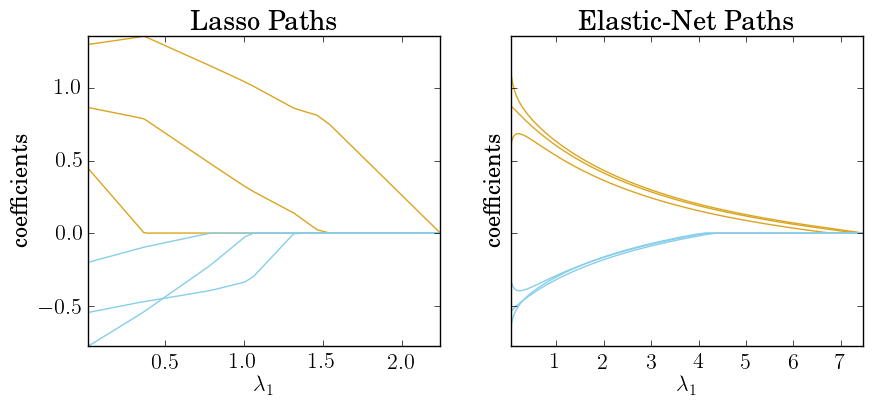

In [19]:
### from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import random as rn

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 16})


#sample size
N=100
mu = 0
sigma = 1

np.random.seed(2)
rn.seed(2)

y=np.empty(0)
X=np.empty([0,6])
for i in range(N):
    Z1= rn.normalvariate(mu,sigma)
    Z2= rn.normalvariate(mu,sigma)
    y = np.append(y, 3*Z1-1.5*Z2+2*rn.normalvariate(mu,sigma))
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.normal(mu, sigma,6)/5
    X = np.vstack ((X, Xarr.tolist()))

# Compute paths
eps = 5e-3  # the smaller it is the longer is the path
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.3, fit_intercept=False)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

figsize = plt.figaspect(1/2.5)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=figsize) 
colors = cycle(['goldenrod', 'goldenrod', 'goldenrod', 'skyblue', 'skyblue', 'skyblue']) 
for coef_l, c in zip(coefs_lasso,colors):
    l1 = ax1.plot(alphas_lasso, coef_l, c=c)

ax1.set_xlabel(r"$\displaystyle\lambda_1$", fontsize=16)
ax1.set_ylabel('coefficients')
ax1.set_title('Lasso Paths')
ax1.axis('tight')

for coef_e, c in zip(coefs_enet, colors):
    l2 = ax2.plot(alphas_enet, coef_e, c=c)

ax2.set_xlabel(r"$\displaystyle\lambda_1$", fontsize=16)
ax2.set_ylabel('coefficients')
ax2.set_title('Elastic-Net Paths')
ax2.axis('tight')

plt.show()

f.tight_layout()
f.savefig('lasso_enet_figure.pdf')

extent = ax1.get_tightbbox(f.canvas.renderer).transformed(f.dpi_scale_trans.inverted())
f.savefig('lasso_figure.pdf', bbox_inches=extent.expanded(1.1, 1.1))

extent = ax2.get_tightbbox(f.canvas.renderer).transformed(f.dpi_scale_trans.inverted())
f.savefig('enet_figure.pdf', bbox_inches=extent.expanded(1.1, 1.1))


